In [1]:
# Import packages.
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pyRMT as rmt
import sys
import os
from pdb import set_trace as bp

In [2]:
from sklearn import covariance as cov
from sklearn import decomposition

In [3]:
home_dir = os.path.expandvars("$HOME")
app_src_dir = '/dev/repos/FinancialAnalyticsSystem/src'
sys.path.insert(0, home_dir + app_src_dir)

In [4]:
%load_ext autoreload
%autoreload 1

In [5]:
%aimport PortfolioManagementSystem


In [6]:
#from PortfolioManagementSystem.pyRMT import *
import PortfolioManagementSystem.portfolio_research_project.pyRMT.pyRMT as rmt

In [7]:
n_true = 1000
n_step = 3
X_l = np.random.randn(n_true,40)
print("X_l shape is: {}".format(X_l.shape))
X_s = X_l[np.arange(0,n_true,n_step)]
print("X_s shape is: {}".format(X_s.shape))

X_l shape is: (1000, 40)
X_s shape is: (334, 40)


In [8]:
S_s = np.cov(X_s, rowvar=False)
S_l = np.cov(X_l, rowvar=False)
print("shape of S_l: {}".format(S_l.shape))

shape of S_l: (40, 40)


In [11]:
def get_sample_data_old(T, N, n_step,
                   mu=0, sigma=1):
    X_l = np.zeros([T, N])
    if 'int' in str(type(mu)) or 'float' in str(type(mu)):
        
        for column in range(N):
            X_l[:, column] = np.random.normal(loc=mu, scale=sigma, size=T)
    else:
        for column in range(N):
            X_l[:, column] = np.random.normal(loc=mu[column], scale=sigma[column], size=T)
    print("X_l shape is: {}".format(X_l.shape))
    X_s = X_l[np.arange(0,T,n_step)]
    print("X_s shape is: {}".format(X_s.shape))
    return X_l, X_s

In [187]:
def get_sample_data(T, N, sampling_percentage,
                   mu=0, sigma=1):
    X_l = np.zeros([T, N])
    # bp()
    test_rows = np.arange(0, T)
    np.random.shuffle(test_rows)
    number_of_samples = int(sampling_percentage * T)
    test_rows = test_rows[:number_of_samples]
    test_rows.sort()
    if 'int' in str(type(mu)) or 'float' in str(type(mu)):
        for column in range(N):
            X_l[:, column] = np.random.normal(loc=mu, scale=sigma, size=T)
    else:
        for column in range(N):
            X_l[:, column] = np.random.normal(loc=mu[column], scale=sigma[column], size=T)
    # print("X_l shape is: {}".format(X_l.shape))
    X_s = X_l[test_rows, :]
    # print("X_s shape is: {}".format(X_s.shape))
    return X_l, X_s

In [102]:
T = 100
N = 10
mu= np.zeros(N)
sigma = np.ones([N, 1]) * 1
X_l, X_s = get_sample_data(T,N, sampling_percentage=0.85,
                           mu=mu, sigma=sigma)

X_l shape is: (100, 10)
X_s shape is: (85, 10)


In [185]:
np.sqrt(get_sample_cov(X_l))

/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.90170727, 0.17357373,        nan, 0.92770648, 0.65313621],
       [0.17357373, 1.12146578, 0.57734078, 0.1554451 , 0.81088948],
       [       nan, 0.57734078, 0.76407347,        nan, 0.47799595],
       [0.92770648, 0.1554451 ,        nan, 1.10143499, 0.48937521],
       [0.65313621, 0.81088948, 0.47799595, 0.48937521, 1.05445349]])

In [186]:
np.sqrt(cov.ledoit_wolf(X_l)[0])

/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.91963471, 0.09131023,        nan, 0.48802945, 0.34358896],
       [0.09131023, 0.9842606 , 0.303716  , 0.08177348, 0.42657667],
       [       nan, 0.303716  , 0.88446628,        nan, 0.25145464],
       [0.48802945, 0.08177348,        nan, 0.97798093, 0.25744082],
       [0.34358896, 0.42657667, 0.25145464, 0.25744082, 0.9635438 ]])

In [7]:
def get_sample_cov(X, X_true=None):
    if X_true is not None:
        S_s = np.cov(X, rowvar=False)
        S_l = np.cov(X_true, rowvar=False)
        print("shape of S_l: {}".format(S_l.shape))
        return S_s, S_l
    else:
        S_s = np.cov(X, rowvar=False)
        return S_s

In [8]:
def get_sample_corr(X, X_true=None):
    if X_true is not None:
        S_s = np.corrcoef(X, rowvar=False)
        S_l = np.corrcoef(X_true, rowvar=False)
        print("shape of S_l: {}".format(S_l.shape))
        return S_s, S_l
    else:
        S_s = np.cov(X, rowvar=False)
        return S_s

In [9]:
eig_S_l = np.linalg.eig(S_l)
print("eig_S_l: {}".format(eig_S_l[0][:3]))
eig_S_s = np.linalg.eig(S_s)
print("eig_S_s: {}".format(eig_S_s[0][:3]))

NameError: name 'S_l' is not defined

In [16]:
X_app = np.zeros(X_l.shape)
m = X_s.shape[0]
n = X_l.shape[0]
A = np.zeros([m, n])
column = 0
for row in range(m):
    A[row,column] = 1
    column += n_step
#print(A)
A = A * np.random.randn(m,n)
for index_feature in range(X_l.shape[1]):
    b = X_s[:,index_feature]
    x = cp.Variable(shape=n_true)
    loss = cp.sum_squares(A @ x - b)
    obj = cp.Minimize(loss)
    c = [x >=-1, x <= 1]
    cp.Problem(obj, c).solve()
    X_app[:,index_feature] = x.value
X_app

array([[ 0.14776894,  0.65231975, -0.70633   , ..., -1.        ,
        -0.37273834, -0.14929941],
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-1.        , -0.59267539,  0.80983757, ..., -1.        ,
        -0.01925598,  1.        ]])

In [10]:
S_s = np.cov(X_s, rowvar=False)
S_l = np.cov(X_l, rowvar=False)
print("shape of S_l: {}".format(S_l.shape))
SCE = np.linalg.norm(S_s - S_l)
print("Sample Covariance Estimator error: {}".format(SCE))
S_app = cov.ledoit_wolf(X_s)[0]
LCE = np.linalg.norm(S_l - S_app)
print("Ledoit-Wolf Covariance Estimator error: {}".format(LCE))
#S_opt = np.cov(X_app, rowvar=False)
#SCE_opt = np.linalg.norm(S_l - S_opt)
#print("Approximated Sample Covariance Estimator error: {}".format(SCE_opt))
#S_opt = cov.ledoit_wolf(X_app)[0]
#SCE_opt = np.linalg.norm(S_l - S_opt)
#print("Approximated Ledoit Covariance Estimator error: {}".format(SCE_opt))

shape of S_l: (40, 40)
Sample Covariance Estimator error: 1.7993572059433665
Ledoit-Wolf Covariance Estimator error: 1.219702848135754


## Implementation and test of Rotationally Invariant Estimator (Bun and Bouchaud)

E_samp $ \leftarrow \mathbb{E} := $ Correlation Matrix <br>
N $\leftarrow$ number of variables (columns) in data Matrix $\bf X$ <br>
eign_decomposition $ \leftarrow \Lambda$, where $\lambda [k] \in \Lambda, $ and $k \in [0, ...,N]$

In [37]:
E_samp = np.corrcoef(X_s, rowvar=False)
#E_samp = S_s
print(E_samp.shape)
eign_decomposition = np.linalg.eig(E_samp)
lamb_V = eign_decomposition[0]
#lamb_V.sort()
#lamb_V = lamb_V[::-1] # reversing the array to 
# set the eigenvalues from largest to smallest
N = X_s.shape[1]
T = X_s.shape[0]
q = T / N


(40, 40)


In [38]:
Z = lamb_V - 1j / np.sqrt(N)

In [39]:
S = np.zeros(Z.shape, dtype=np.complex_)

In [40]:
for k, z_k in enumerate(Z):
    for j, lamb_k, in enumerate(lamb_V):
        if j != k:
            S[k] += 1 / (z_k - lamb_k)
    S[k] = S[k] * 1 / N

$\zeta^{RIE}$

In [41]:
Zeta_rie = np.zeros(N)
for k in range(N):
    Zeta_rie[k] = lamb_V[k] / np.abs( 1- q + q * Z[k] * S[k]) ** 2

$\lambda_{N}$ <br>
$\sigma^2$

In [42]:
#lamb_N = lamb_V[lamb_V.size - 1]
lamb_N = lamb_V.min()
sigma_squared = lamb_N / (1 - np.sqrt(q)) ** 2

$\lambda_{+}$

In [43]:
lamb_plus = lamb_N * ((1 + np.sqrt(q)) / (1 - np.sqrt(q))) ** 2

$G_{mp}$

In [44]:
G_mp = (Z + sigma_squared * (q - 1) - np.sqrt(Z - lamb_N) * np.sqrt(Z - lamb_plus))

In [45]:
G_mp = G_mp / (2 * q * Z * sigma_squared)

In [46]:
#Gama = sigma_squared * np.abs( 1- q + q * Z * G_mp) ** 2
#Gama = Gama / lamb_V

$\Gamma$

In [47]:
Gama = np.zeros(N)
for k in range(N):
    Gama[k] = (sigma_squared * np.abs( 1- q + q * Z[k] * G_mp[k]) ** 2) / lamb_V[k]
    

$\hat{\zeta}^{RIE}$

In [48]:
Zeta_hat = np.zeros(Gama.shape)
for k, gama in enumerate(Gama):
    if gama > 1:
        Zeta_hat[k] = gama * Zeta_rie[k]
    else:
        Zeta_hat[k] = Zeta_rie[k]

In [49]:
Zeta_hat[:5]

array([0.00689349, 0.00666592, 0.00635245, 0.00485344, 0.00456438])

In [50]:
Sigma_RIE = np.zeros(Zeta_hat.shape)
for k in range(N):
    Sigma_RIE += Zeta_hat[k] * eign_decomposition[1][k] * eign_decomposition[1][k].conj()
Sigma_RIE

array([0.0036208 , 0.00319092, 0.00323365, 0.00354666, 0.00323273,
       0.00374893, 0.00316102, 0.00386324, 0.00338371, 0.00317834,
       0.00358041, 0.00389044, 0.00335472, 0.0035722 , 0.00376755,
       0.00390191, 0.00300471, 0.00358413, 0.00321647, 0.00378446,
       0.00362788, 0.00343672, 0.00391936, 0.00342967, 0.00410057,
       0.00335795, 0.00356793, 0.004231  , 0.00322871, 0.0037565 ,
       0.0035091 , 0.00331253, 0.00378762, 0.0035385 , 0.00364012,
       0.00320905, 0.00330952, 0.00333708, 0.00310742, 0.00363415])

In [51]:
eign_decomposition[1][k]

array([-0.10075713,  0.08981032, -0.35025544,  0.0250042 , -0.15842827,
        0.04429129,  0.11633071,  0.14004332,  0.23600271, -0.00282309,
        0.10273285, -0.15164799,  0.13781757,  0.11205479, -0.2622205 ,
        0.03339619, -0.06661762, -0.01207636,  0.01369634,  0.04704815,
        0.05631697,  0.0164395 ,  0.22256213, -0.31387537,  0.07881369,
        0.00743701,  0.05962766,  0.22917147, -0.04562485, -0.14443895,
        0.20394234,  0.09751978,  0.05930173,  0.18691303,  0.34198263,
        0.083187  ,  0.2745542 ,  0.17847883,  0.20695889, -0.01820426])

In [52]:
Zeta_hat

array([0.00689349, 0.00666592, 0.00635245, 0.00485344, 0.00456438,
       0.00453208, 0.00433788, 0.00432432, 0.00434897, 0.00436955,
       0.00216712, 0.00440992, 0.0043603 , 0.00214795, 0.00417252,
       0.00215685, 0.002174  , 0.00218405, 0.00405568, 0.00223658,
       0.00229831, 0.00231605, 0.00236994, 0.00245742, 0.00250224,
       0.00260879, 0.00265476, 0.00271977, 0.00280904, 0.00291326,
       0.00308655, 0.00309469, 0.00317846, 0.0032425 , 0.00379314,
       0.00371813, 0.00337809, 0.00335868, 0.00354145, 0.00350962])

In [53]:
lamb_V

array([1.75046152, 1.71257563, 1.64512986, 1.5128936 , 1.47699094,
       1.47153978, 1.41224073, 1.3861837 , 1.35499069, 1.34025102,
       0.46369549, 1.26853878, 1.24041678, 0.50352709, 1.18759845,
       0.5337295 , 0.55454577, 0.56371205, 1.16288919, 0.60025351,
       0.63334417, 0.64182384, 0.66561532, 0.69945618, 0.71495592,
       0.74790483, 0.76084777, 0.77835529, 0.80180515, 0.83015046,
       0.88617122, 0.88917395, 0.92168262, 0.94807459, 1.11145827,
       1.09619133, 1.00373506, 0.99626882, 1.05527527, 1.04663017])

In [57]:
#true_eigen_values = np.linalg.eig(np.corrcoef(X_l, rowvar=False))[0]
true_eigen_values = np.linalg.eig(np.cov(X_l, rowvar=False))[0]
true_eigen_values

array([1.47508874, 1.37056566, 1.35804479, 0.64710944, 1.30553902,
       1.29217493, 0.67122327, 1.25930679, 0.6890463 , 1.22197765,
       0.72931265, 1.2014787 , 1.19077886, 1.17855866, 0.74489902,
       0.75680699, 1.15339969, 1.1361488 , 1.1235042 , 0.77985079,
       0.79236078, 0.79976748, 1.09693349, 1.07219721, 1.06919357,
       1.05375727, 0.81839844, 1.03430367, 1.01223663, 1.00409248,
       0.98437161, 0.97850254, 0.95346856, 0.92640031, 0.92189751,
       0.84067798, 0.86086895, 0.86641607, 0.8857344 , 0.88505784])

# Tests with PyRMT

In [43]:
N = 10
T = 50
n_step = 3
#S_true = np.random.randint(0, 10, size=N).reshape([N, 1])# np.ones([N, 1])
S_true = np.ones([N, 1]) * 0.5
X_l, X_s = get_sample_data(T, N, n_step, mu=0, sigma=S_true)



X_l shape is: (50, 10)
X_s shape is: (17, 10)


In [44]:
compute_cov_mse = lambda ref, test: np.linalg.norm(ref - np.sqrt(np.diag(test)))

In [45]:
S_s = np.cov(X_s, rowvar=False)
S_l = np.cov(X_l, rowvar=False)
print("shape of S_l: {}".format(S_l.shape))
SCE = compute_cov_mse(S_true, S_s)
print("Sample Covariance Estimator error: {}".format(SCE))
S_app = cov.ledoit_wolf(X_s)[0]
LCE = compute_cov_mse(S_true, S_app)
print("Ledoit-Wolf Covariance Estimator error: {}".format(LCE))
S_RIE = rmt.optimalShrinkage(X_s, return_covariance=True)
LCE = compute_cov_mse(S_true, S_RIE)
print("RIE Covariance Estimator error: {}".format(LCE))

shape of S_l: (10, 10)
Sample Covariance Estimator error: 0.50190108572199
Ledoit-Wolf Covariance Estimator error: 0.39816479203836797
RIE Covariance Estimator error: 0.5765254014395057


In [62]:
def calculate_mdp(sigma):
    """
    Maximum Diversified Portfolio
    :param sigma: covariance matrix
    :param min_gmvp_point: paramter that stipulates what is the minimum gmpv point at which
    to place as constraint in the QCP
    :return:
    """
    N = sigma.shape[0]
    # bp()
    volatilities = np.sqrt(np.diag(sigma))
    volatilities = volatilities.reshape(volatilities.shape[0], 1)
    inv_volatilities = 1 / volatilities.T
    inv_volatilities = inv_volatilities.reshape(volatilities.shape[0], 1)
    x = cp.Variable(shape=(N,1))
    D = cp.Variable(shape=(1,1))
    kappa = 1 / D
    # kappa_factor = kappa @ inv_volatilities.T
    inv_sigma = np.linalg.inv(sigma)
    ones = np.ones([N, 1])
    # M = kappa_factor @ inv_sigma @ ones
    
    constraints = [kappa * inv_sigma @ ones >= np.ones([N,1]) * 0,
                   kappa * np.ones([N,1]).T @ inv_sigma @ ones == 1,
                   
                  ]
    problem = cp.Problem(cp.Maximize(D),
                         constraints)
    optimum = problem.solve(qcp=True)

    return D.value, optimum

In [63]:
calculate_mdp(S_s)

DCPError: Problem does not follow DCP rules.

In [212]:
def calculate_gmvp(sigma):
    """
    General Mean Variance Portfolio
    :param sigma:
    :return:
    """
    N = sigma.shape[0]
    x = cp.Variable(shape=(N,1))
    problem = cp.Problem(cp.Minimize(cp.quad_form(x, sigma)),
                         [x >= np.ones([N,1]) * 0,
                          np.ones([N,1]).T @ x == 1])
    optimum = problem.solve()
    return x.value, optimum

In [217]:
calculate_gmvp(S_l)[1]

0.015670660652004356

In [218]:
N = S_l.shape[0]
1 / (np.ones([1, N]) @ np.linalg.inv(S_l) @ np.ones([N, 1]))

array([[0.01564263]])

In [150]:
def build_mse_test_old(N, T, n_step, true_mu=0, true_sigma=1,
                   number_of_tests=5, vary_observations=False,
                   correlation=False):
    if number_of_tests >= n_step:
        raise Exception("Number of tests is wrong. Must be the same, or smaller than n_step")
    result_container = pd.DataFrame(columns=["SCE", "LWE", "RIE"])
    ratio_of_true_cov = []
    for test_index in range(number_of_tests):
        test_step = n_step - test_index
        X_l, X_s = get_sample_data(T, N, test_step, mu=true_mu, sigma=true_sigma)
        ratio_of_true_cov.append(X_s.shape[0] / X_l.shape[0])
        
        S_s = np.cov(X_s, rowvar=False)
        S_l = np.cov(X_l, rowvar=False)
        #print("shape of S_l: {}".format(S_l.shape))
        SCE = np.linalg.norm(S_s - S_l)**2
        #print("Sample Covariance Estimator error: {}".format(SCE))
        S_app = cov.ledoit_wolf(X_s)[0]
        LCE = np.linalg.norm(S_l - S_app)**2
        #print("Ledoit-Wolf Covariance Estimator error: {}".format(LCE))
        S_RIE = rmt.optimalShrinkage(X_s, return_covariance=True)
        RIE = np.linalg.norm(S_l - S_RIE)**2
        #print("RIE Covariance Estimator error: {}".format(RIE))
        result_container.loc[result_container.index.size] = [SCE, LCE, RIE]
    result_container.index = ratio_of_true_cov
    return result_container
        

In [115]:
def build_mse_test(N, T, n_step, true_mu=0, true_sigma=1,
                   number_of_tests=5, vary_observations=False,
                   correlation=False):
    if number_of_tests >= n_step:
        raise Exception("Number of tests is wrong. Must be the same, or smaller than n_step")
    result_container = pd.DataFrame(columns=["SCE", "LWE", "RIE"])
    ratio_of_true_cov = []
    test_ratios = np.linspace(1 / number_of_tests, 1, num=number_of_tests)
    for test_ratio in test_ratios:
        # test_step = n_step - test_index
        X_l, X_s = get_sample_data(T, N, sampling_percentage=test_ratio,
                                   mu=true_mu, sigma=true_sigma)
        ratio_of_true_cov.append(test_ratio)
        if 'int' in str(type(true_sigma)) or 'float' in str(type(true_sigma)):
            true_sigma = np.ones([N, 1]) * true_sigma
        S_s = np.cov(X_s, rowvar=False)
        S_l = np.cov(X_l, rowvar=False)
        #print("shape of S_l: {}".format(S_l.shape))
        test_variance = lambda x: np.sqrt(np.diag(x))
        SCE = np.linalg.norm(true_sigma - test_variance(S_s))**2
        #print("Sample Covariance Estimator error: {}".format(SCE))
        S_app = cov.ledoit_wolf(X_s)[0]
        LCE = np.linalg.norm(true_sigma - test_variance(S_app))**2
        #print("Ledoit-Wolf Covariance Estimator error: {}".format(LCE))
        S_RIE = rmt.optimalShrinkage(X_s, return_covariance=True)
        RIE = np.linalg.norm(true_sigma - test_variance(S_RIE))**2
        #print("RIE Covariance Estimator error: {}".format(RIE))
        result_container.loc[result_container.index.size] = [SCE, LCE, RIE]
    result_container.index = ratio_of_true_cov
    return result_container
        

# Tests with different number of variables

The tests below look at how the three estimators perform in approximating the true covariance matrix, given N variables and T observations. Each test varies the number of observations that is used from the True data matrix X.

X_s shape is: (55, 10)
X_s shape is: (111, 10)
X_s shape is: (166, 10)
X_s shape is: (222, 10)
X_s shape is: (277, 10)
X_s shape is: (333, 10)
X_s shape is: (388, 10)
X_s shape is: (444, 10)
X_s shape is: (500, 10)


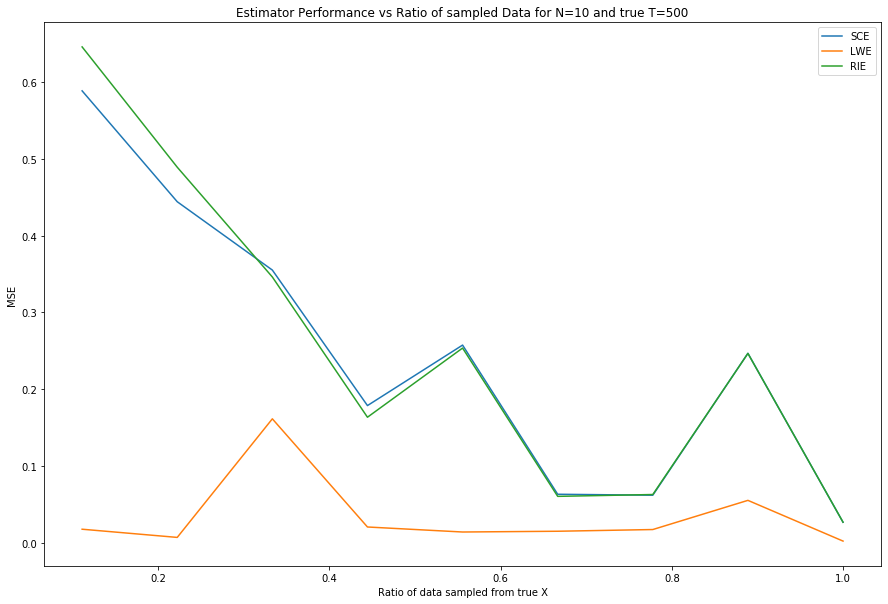

In [116]:
N = 10
T = 500
n_step = 10
number_of_tests = 9
#S_true = np.random.randint(0, 10, size=N).reshape([N, 1])# np.ones([N, 1])
S_true = np.ones([N, 1]) * 1
true_mu = np.ones([N, 1]) * 0
result_container = build_mse_test(N=N, T=T, n_step=n_step, true_mu=true_mu, true_sigma=S_true,
                   number_of_tests=number_of_tests, vary_observations=False,
                   correlation=False)
plt.figure(figsize=(15,10))
plt.title('Estimator Performance vs Ratio of sampled Data for N={} and true T={}'.format(N, T))
plt.xlabel('Ratio of data sampled from true X')
plt.ylabel('MSE')
for column in result_container.columns:
    plt.plot(result_container.index, result_container[column], label=column)
plt.legend()
plt.show()

X_s shape is: (55, 25)
X_s shape is: (111, 25)
X_s shape is: (166, 25)
X_s shape is: (222, 25)
X_s shape is: (277, 25)
X_s shape is: (333, 25)
X_s shape is: (388, 25)
X_s shape is: (444, 25)
X_s shape is: (500, 25)


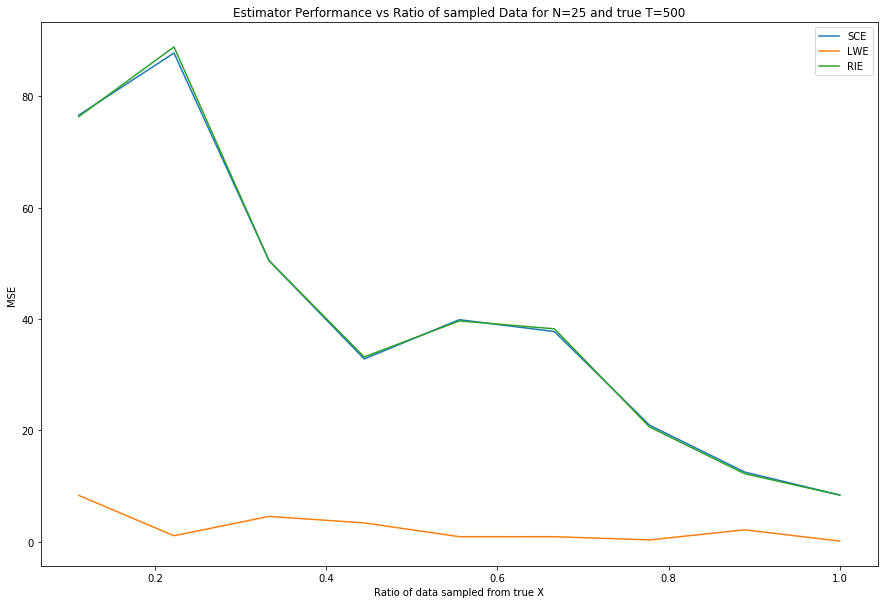

In [117]:
N = 25
T = 500
n_step = 10
number_of_tests = 9
#S_true = np.random.randint(0, 10, size=N).reshape([N, 1])# np.ones([N, 1])
S_true = np.ones([N, 1]) * 5
true_mu = np.ones([N, 1]) * 0
result_container = build_mse_test(N=N, T=T, n_step=n_step, true_mu=true_mu, true_sigma=S_true,
                   number_of_tests=number_of_tests, vary_observations=False,
                   correlation=False)
plt.figure(figsize=(15,10))
plt.title('Estimator Performance vs Ratio of sampled Data for N={} and true T={}'.format(N, T))
plt.xlabel('Ratio of data sampled from true X')
plt.ylabel('MSE')
for column in result_container.columns:
    plt.plot(result_container.index, result_container[column], label=column)
plt.legend()
plt.show()

X_s shape is: (55, 50)
X_s shape is: (111, 50)
X_s shape is: (166, 50)
X_s shape is: (222, 50)
X_s shape is: (277, 50)
X_s shape is: (333, 50)
X_s shape is: (388, 50)
X_s shape is: (444, 50)
X_s shape is: (500, 50)


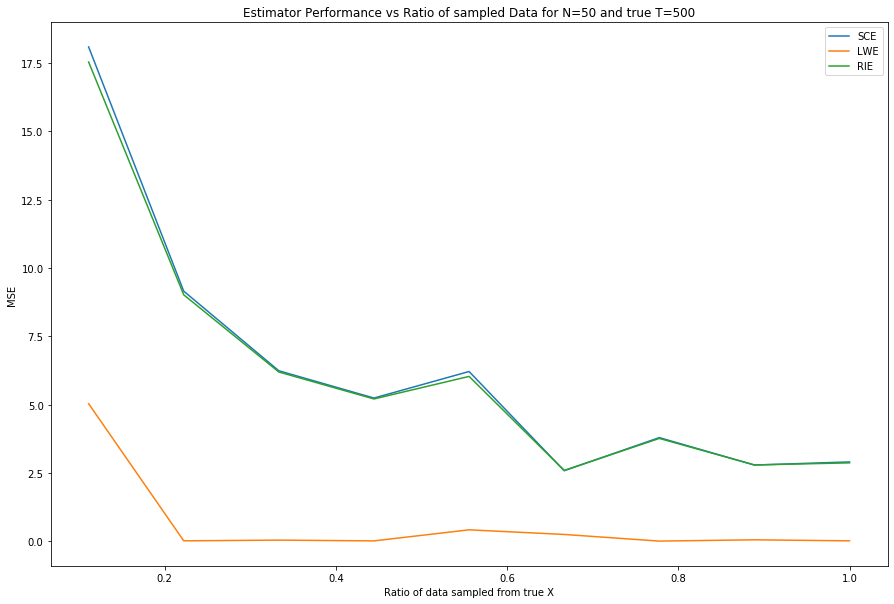

In [118]:
N = 50
T = 500
n_step = 10
number_of_tests = 9
#S_true = np.random.randint(0, 10, size=N).reshape([N, 1])# np.ones([N, 1])
S_true = np.ones([N, 1]) * 1
true_mu = np.ones([N, 1]) * 0
result_container = build_mse_test(N=N, T=T, n_step=n_step, true_mu=true_mu, true_sigma=S_true,
                   number_of_tests=number_of_tests, vary_observations=False,
                   correlation=False)
plt.figure(figsize=(15,10))
plt.title('Estimator Performance vs Ratio of sampled Data for N={} and true T={}'.format(N, T))
plt.xlabel('Ratio of data sampled from true X')
plt.ylabel('MSE')
for column in result_container.columns:
    plt.plot(result_container.index, result_container[column], label=column)
plt.legend()
plt.show()

X_s shape is: (55, 100)
X_s shape is: (111, 100)
X_s shape is: (166, 100)
X_s shape is: (222, 100)
X_s shape is: (277, 100)


/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:126: UserWarning: The Marcenko-Pastur distribution pertains to the empirical covariance matrix of a random matrix X of shape (T, N). It is assumed that the number of samples T is assumed higher than the number of features N. The transpose of the matrix X submitted at input will be considered in the cleaning schemes for the corresponding correlation matrix.
  "for the corresponding correlation matrix.", UserWarning)


X_s shape is: (333, 100)
X_s shape is: (388, 100)
X_s shape is: (444, 100)
X_s shape is: (500, 100)


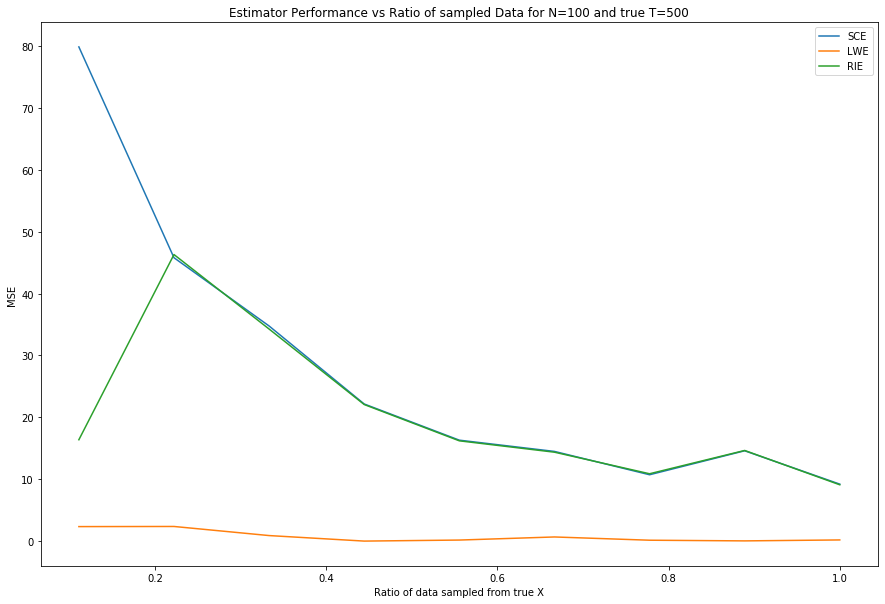

In [119]:
N = 100
T = 500
n_step = 10
number_of_tests = 9
#S_true = np.random.randint(0, 10, size=N).reshape([N, 1])# np.ones([N, 1])
S_true = np.ones([N, 1]) * 1
true_mu = np.ones([N, 1]) * 0
result_container = build_mse_test(N=N, T=T, n_step=n_step, true_mu=true_mu, true_sigma=S_true,
                   number_of_tests=number_of_tests, vary_observations=False,
                   correlation=False)
plt.figure(figsize=(15,10))
plt.title('Estimator Performance vs Ratio of sampled Data for N={} and true T={}'.format(N, T))
plt.xlabel('Ratio of data sampled from true X')
plt.ylabel('MSE')
for column in result_container.columns:
    plt.plot(result_container.index, result_container[column], label=column)
plt.legend()
plt.show()

X_s shape is: (55, 500)
X_s shape is: (111, 500)
X_s shape is: (166, 500)


/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:126: UserWarning: The Marcenko-Pastur distribution pertains to the empirical covariance matrix of a random matrix X of shape (T, N). It is assumed that the number of samples T is assumed higher than the number of features N. The transpose of the matrix X submitted at input will be considered in the cleaning schemes for the corresponding correlation matrix.
  "for the corresponding correlation matrix.", UserWarning)


X_s shape is: (222, 500)
X_s shape is: (277, 500)
X_s shape is: (333, 500)
X_s shape is: (388, 500)
X_s shape is: (444, 500)
X_s shape is: (500, 500)


/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:449: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_plus /= (1 - np.sqrt(q))**2
/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:451: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_2 = lambda_N / (1 - np.sqrt(q))**2
/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:455: RuntimeWarning: invalid value encountered in double_scalars
  gmp = z + sigma_2 * (q - 1) - np.sqrt((z - lambda_N) * (z - lambda_plus))
/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:455: RuntimeWarning: invalid value encountered in cdouble_scalars
  gmp = z + sigma_2 * (q - 1) - np.sqrt((z - lambda_N) * (z - lambda_plus))
/home/l7/dev/repos/FinancialAnalyticsSyst

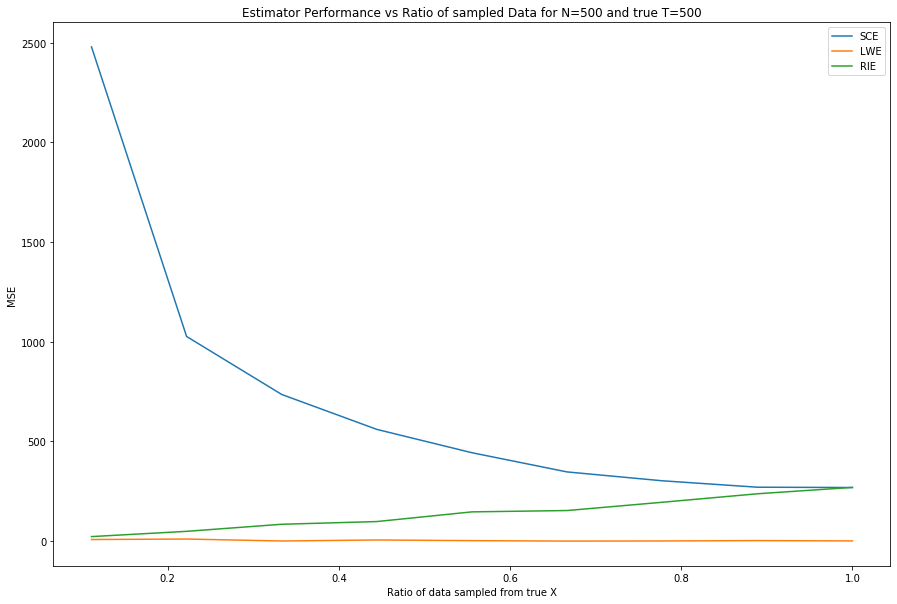

In [120]:
N = 500
T = 500
n_step = 10
number_of_tests = 9
#S_true = np.random.randint(0, 10, size=N).reshape([N, 1])# np.ones([N, 1])
S_true = np.ones([N, 1]) * 1
true_mu = np.ones([N, 1]) * 0
result_container = build_mse_test(N=N, T=T, n_step=n_step, true_mu=true_mu, true_sigma=S_true,
                   number_of_tests=number_of_tests, vary_observations=False,
                   correlation=False)
plt.figure(figsize=(15,10))
plt.title('Estimator Performance vs Ratio of sampled Data for N={} and true T={}'.format(N, T))
plt.xlabel('Ratio of data sampled from true X')
plt.ylabel('MSE')
for column in result_container.columns:
    plt.plot(result_container.index, result_container[column], label=column)
plt.legend()
plt.show()

### Conclusions: 

Results indicate that for cases where the number of variables are below 200, LWE does much better, up until the number of observations reach 50% of the true number of observations. However, as the number of variables increase, RIE progressively does better. In fact, RIE authors claim that their method is made for a more robust approximation in where N is large. Therefore, from an MSE perspective, this is correct. 

/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:449: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_plus /= (1 - np.sqrt(q))**2
/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:451: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_2 = lambda_N / (1 - np.sqrt(q))**2
/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:455: RuntimeWarning: invalid value encountered in double_scalars
  gmp = z + sigma_2 * (q - 1) - np.sqrt((z - lambda_N) * (z - lambda_plus))
/home/l7/dev/repos/FinancialAnalyticsSystem/src/PortfolioManagementSystem/portfolio_research_project/pyRMT/pyRMT.py:455: RuntimeWarning: invalid value encountered in cdouble_scalars
  gmp = z + sigma_2 * (q - 1) - np.sqrt((z - lambda_N) * (z - lambda_plus))
/home/l7/dev/repos/FinancialAnalyticsSyst

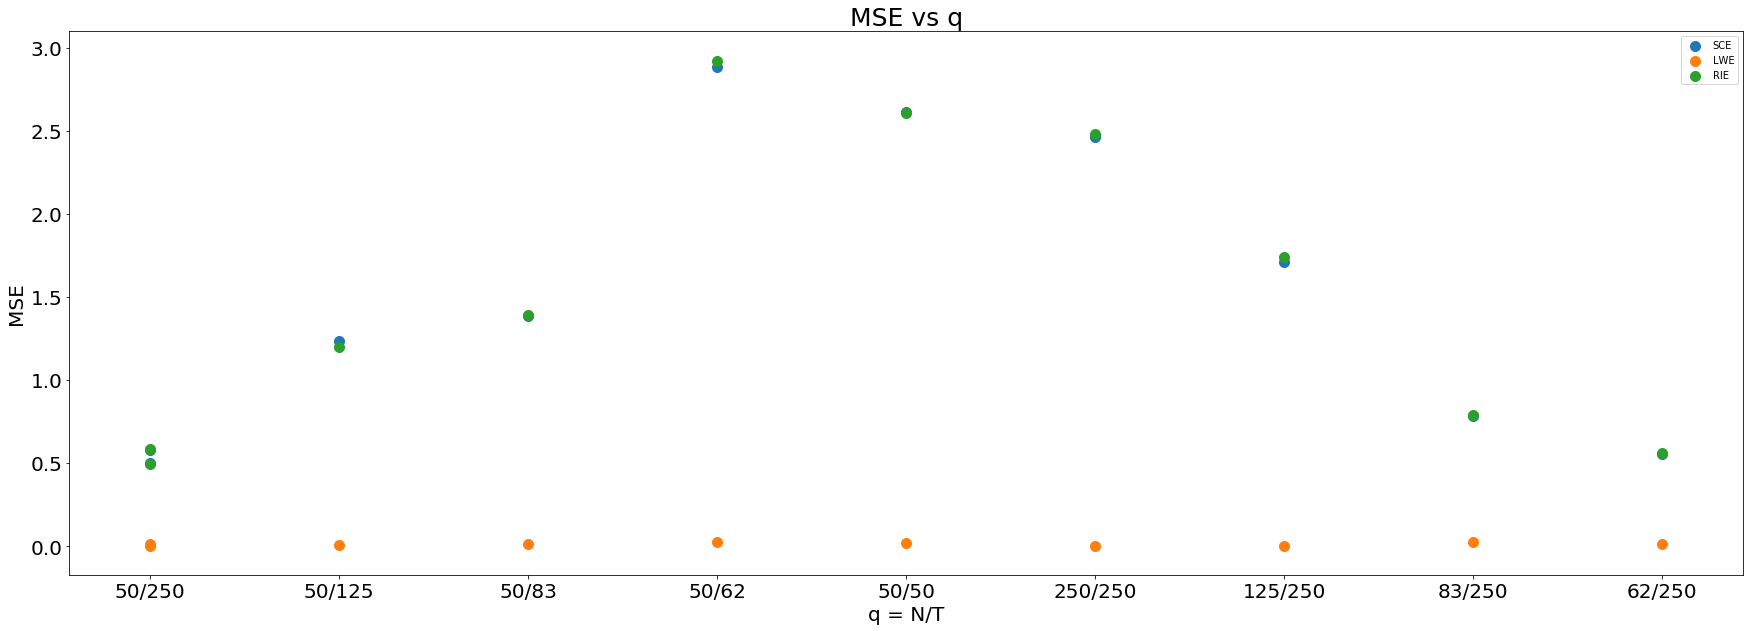

In [207]:
N_stat = 50
number_of_tests = 5
percentages = np.linspace(1 / number_of_tests, 1, number_of_tests)
T = N_stat / percentages
T = np.array(T, dtype=int)
T_stat = max(T)
N = T
S_true = np.ones([len(N), 1]) * 1
true_mu = np.ones([len(N), 1]) * 0
result_container = pd.DataFrame(columns=["SCE", "LWE", "RIE"])
q_set = []
for observation in T:
    # test_step = n_step - test_index
    X_l, X_s = get_sample_data(observation, N_stat, sampling_percentage=1)
    if 'int' in str(type(S_true)) or 'float' in str(type(S_true)):
        S_true = np.ones([N, 1]) * S_true
    S_s = np.cov(X_s, rowvar=False)
    S_l = np.cov(X_l, rowvar=False)
    #print("shape of S_l: {}".format(S_l.shape))
    test_variance = lambda x: np.sqrt(np.diag(x))
    SCE = np.linalg.norm(S_true - test_variance(S_l))**2
    #print("Sample Covariance Estimator error: {}".format(SCE))
    S_app = cov.ledoit_wolf(X_s)[0]
    LCE = np.linalg.norm(S_true - test_variance(S_app))**2
    #print("Ledoit-Wolf Covariance Estimator error: {}".format(LCE))
    S_RIE = rmt.optimalShrinkage(X_s, return_covariance=True)
    RIE = np.linalg.norm(S_true - test_variance(S_RIE))**2
    q_set.append("{}/{}".format(N_stat, observation))
    #q_set.append(N_stat / observation)
    result_container.loc[result_container.index.size] = [SCE, LCE, RIE]
    #print("RIE Covariance Estimator error: {}".format(RIE))
for asset_number in N:
    X_l, X_s = get_sample_data(T_stat, asset_number, sampling_percentage=1)
    if 'int' in str(type(S_true)) or 'float' in str(type(S_true)):
        S_true = np.ones([N, 1]) * S_true
    S_s = np.cov(X_s, rowvar=False)
    S_l = np.cov(X_l, rowvar=False)
    #print("shape of S_l: {}".format(S_l.shape))
    test_variance = lambda x: np.sqrt(np.diag(x))
    SCE = np.linalg.norm(S_true - test_variance(S_l))**2
    #print("Sample Covariance Estimator error: {}".format(SCE))
    S_app = cov.ledoit_wolf(X_s)[0]
    LCE = np.linalg.norm(S_true - test_variance(S_app))**2
    #print("Ledoit-Wolf Covariance Estimator error: {}".format(LCE))
    S_RIE = rmt.optimalShrinkage(X_s, return_covariance=True)
    RIE = np.linalg.norm(S_true - test_variance(S_RIE))**2
    q_set.append("{}/{}".format(asset_number, T_stat))
    #q_set.append(N_stat / observation)
    result_container.loc[result_container.index.size] = [SCE, LCE, RIE]
# bp()
result_container.index = q_set
# result_container = result_container.groupby(result_container.index).first()
# result_container = result_container.sort_index()
plt.figure(figsize=(30,10))
axis_fontsize = 20
title_fontsize = 25
plt.xticks(fontsize=axis_fontsize)
plt.yticks(fontsize=axis_fontsize)
plt.xlabel('q = N/T', fontsize=axis_fontsize)
plt.ylabel('MSE', fontsize=axis_fontsize)
plt.title('MSE vs q', fontsize=title_fontsize)
for column in result_container.columns:
    #plt.scatter(result_container.index, result_container[column], label=column)
    plt.scatter(result_container.index,
             result_container[column],
             label=column, s=100
             # *[color] * len(result_container)
            )
plt.legend()
plt.show()

The graph above show how the varying N and T change the MSE. In addition, it is possible to see the performance of LWE, SCE, and RIE. 